In [93]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.decomposition import PCA
from scipy import stats

In [21]:
#load example data

age = "https://raw.githubusercontent.com/xroopnar/SPUG2019/master/SPUG_agemodel.csv"
data = "https://raw.githubusercontent.com/xroopnar/SPUG2019/master/SPUG_tiny_data.csv"
labels = "https://raw.githubusercontent.com/xroopnar/SPUG2019/master/SPUG_labels.csv"
fscores = "https://raw.githubusercontent.com/xroopnar/SPUG2019/master/SPUG_fscores.csv"

age = pd.read_csv(age,index_col=0)
data = pd.read_csv(data,index_col=0)
labels = pd.read_csv(labels,index_col=0)
#labels.TissueName = list(labels.TissueName)
fscores = pd.read_csv(fscores,index_col=0)
print(age.shape,data.shape,labels.shape,fscores.shape)

sns.set_style("whitegrid")

(282, 3) (1242, 1000) (9154, 9) (7, 6)


In [22]:
## Visualize labels

In [23]:
labels.head()

,TaxonID,PlatformID,ExperimentID,Molecule,Age,Gender,TissueID,DiseaseState,TissueName
GSM1617040,9606,13534,66210,genomic DNA,NaN,NaN,89,0,blood
GSM1831335,9606,13534,71245,genomic DNA,49.0,F,89,0,blood
GSM990274,9606,13534,40279,genomic DNA,NaN,M,89,0,blood
GSM1509964,9606,13534,61653,genomic DNA,NaN,NaN,89,0,blood
GSM1225699,9606,13534,50660,genomic DNA,56.0,F,89,0,blood


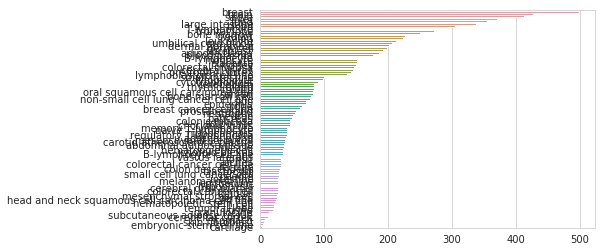

In [24]:
label_counts = labels.TissueName.value_counts()
sns.barplot(y=label_counts.index,x=label_counts.values)
plt.show()

In [43]:
#align data to annotations to find relevant annotations or missing information
data,labels = data.align(labels,join="inner",axis=0)

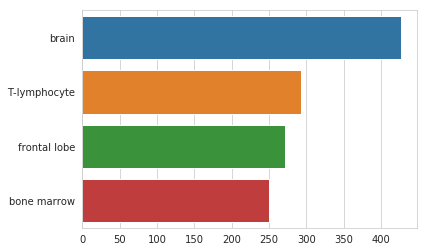

In [44]:
#label_counts = labels.TissueName.value_counts().sort_values(ascending=False)[0:20]
label_counts = labels.TissueName.value_counts()
sns.barplot(y=label_counts.index,x=label_counts.values)
plt.show()

In [ ]:
## Visualize data

In [28]:
data.shape

(1242, 1000)

In [27]:
data.head()

,9611,100132707,574494,54622,440465,64151,441282,5524,23344,57178,...,102682016,390038,4784,9577,54453,9439,554223,441272,103344929,8823
GSM1404124,0.593278,0.159713,0.552773,0.887201,0.752376,0.064782,0.577760,0.459988,0.075172,0.098989,...,0.261808,0.581119,0.363503,0.791346,0.112213,0.791812,0.884257,0.773579,0.688271,0.805395
GSM1438264,0.671212,0.503595,0.668371,0.671141,0.350839,0.106301,0.478525,0.172701,0.122911,0.106552,...,0.597478,0.753756,0.572624,0.740464,0.195841,0.793637,0.732863,0.850680,0.813435,0.729730
GSM1269760,0.754687,0.481456,0.642046,0.529795,0.749447,0.082483,0.613443,0.332416,0.091326,0.167530,...,0.095672,0.777432,0.556090,0.809779,0.250353,0.775489,0.802736,0.870004,0.671667,0.657290
GSM886067,0.824935,0.442685,0.677556,0.538332,0.781661,0.055583,0.631201,0.278238,0.082505,0.092253,...,0.543296,0.582827,0.448941,0.811930,0.255680,0.743877,0.767874,0.826049,0.235668,0.811777
GSM1404009,0.638180,0.226426,0.547676,0.818637,0.704749,0.062868,0.541751,0.322037,0.085700,0.102336,...,0.627477,0.544007,0.397251,0.826884,0.119193,0.710059,0.850233,0.773076,0.761416,0.382550


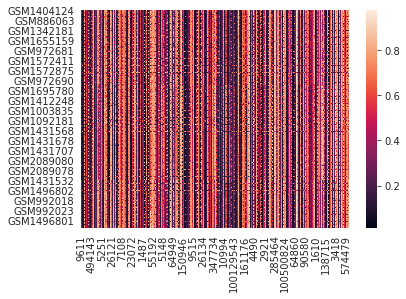

In [45]:
#too much data to "just look at it"
sns.heatmap(data=data)
plt.show()

/home/xiavan/.local/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


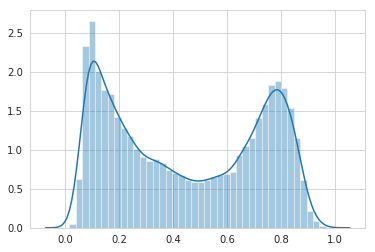

In [30]:
data_dist = data.sample(100).T.sample(1000).T.unstack()
sns.distplot(data_dist)
plt.show()

In [33]:
data_means = data.mean(axis=0)
print(data_means.shape)

(1000,)


/home/xiavan/.local/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


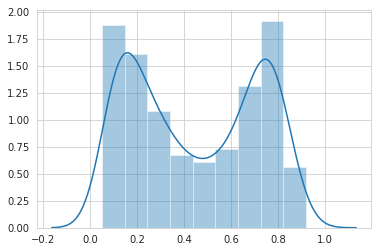

In [34]:
sns.distplot(data_means)
plt.show()

In [35]:
## stripplot and entrez plots

/home/xiavan/.local/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


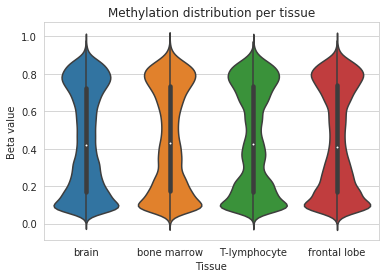

In [58]:
#seaborn can take lists of arrays
tissue_dist = []
tissue_labels = labels.TissueName.unique()
for tissue in tissue_labels:
    current_tissue = labels[labels.TissueName==tissue].index
    current_tissue = data.loc[current_tissue]
    tissue_dist.append(current_tissue)
vplot = sns.violinplot(data=tissue_dist)
vplot.set_xticklabels(tissue_labels)
plt.title("Methylation distribution per tissue")
plt.ylabel("Beta value")
plt.xlabel("Tissue")
plt.show()

In [36]:
## normalization

In [66]:
## PCA

In [71]:
pca = PCA(n_components=100)
pc = pca.fit_transform(data)
#remember to preserve index!
pc = pd.DataFrame(pc,index=data.index)
pc.columns = [ "PC"+str(x+1) for x in pc.columns]
pc["Tissue"] = labels.loc[data.index].TissueName
pc.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC92,PC93,PC94,PC95,PC96,PC97,PC98,PC99,PC100,Tissue
GSM1404124,-1.510602,0.730523,-1.567068,-0.092432,-0.364702,0.895185,-1.394593,0.216295,0.065080,-0.078052,...,-0.013209,-0.066768,-0.100121,0.059694,0.023346,-0.070884,0.001452,-0.113363,0.003141,brain
GSM1438264,-1.607297,0.061118,0.554576,0.117442,0.141842,0.247409,0.768103,1.772168,0.889381,0.115321,...,0.006593,-0.003135,-0.033743,-0.007234,-0.009567,-0.045754,0.035476,0.006478,0.027372,brain
GSM1269760,-1.031312,0.258989,-0.156298,-0.543271,0.375979,-0.562699,-0.164434,-0.023162,-0.412986,0.632205,...,-0.074617,-0.000732,-0.023576,-0.020144,0.004330,0.026706,0.024981,-0.041719,0.081290,brain
GSM886067,-1.019721,1.092872,-1.943406,-0.615656,0.133784,0.485715,-0.307163,-0.097142,0.282798,0.308268,...,0.075121,0.120749,-0.160389,0.119605,-0.192430,-0.044476,-0.023176,-0.049065,-0.124197,brain
GSM1404009,-1.444976,0.923348,-1.614801,-0.450103,0.330486,0.698191,-1.400034,0.209599,0.390380,0.276386,...,0.032555,-0.052006,-0.063278,-0.049808,0.180833,0.080767,0.045270,0.006894,0.019932,brain


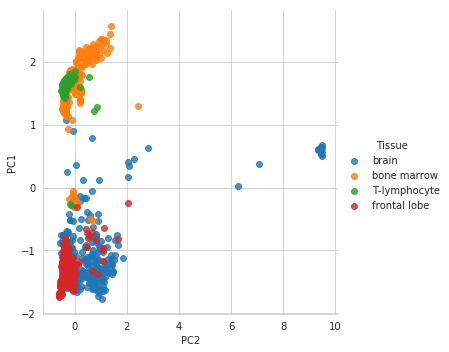

In [73]:
sns.lmplot(y="PC1",x="PC2",data=pc,hue="Tissue",fit_reg=False)
plt.show()

In [74]:
## plot tabular data into heatmap

In [84]:
fscores.shape

(7, 6)

In [83]:
fscores

,KNN,LOGR,RF,KNN.1,LOGR.1,RF.1
Probe,0.93,0.9700,0.9200,0.96,0.96,0.95
Probe Control,0.94,0.9700,0.9300,0.94,0.96,0.95
Promoter,0.79,0.8700,0.7700,0.94,0.95,0.93
Genebody,0.77,0.8800,0.7300,0.94,0.95,0.92
CGI,0.75,0.8700,0.7300,0.94,0.95,0.93
Expression,0.64,0.4200,0.6800,0.78,0.69,0.91
Permuted Prom.,0.01,0.0076,0.0094,0.50,0.49,0.50


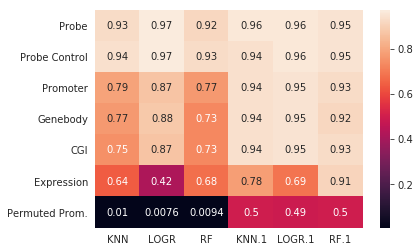

In [77]:
sns.heatmap(fscores,annot=True)
plt.show()

In [79]:
## scatterplot with dist, r2 of predictions

In [81]:
#matplotlib example

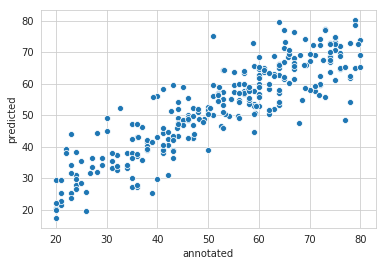

In [85]:
#scatterplot 
sns.scatterplot(x="annotated",y="predicted",data=age)
plt.show()

/home/xiavan/.local/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


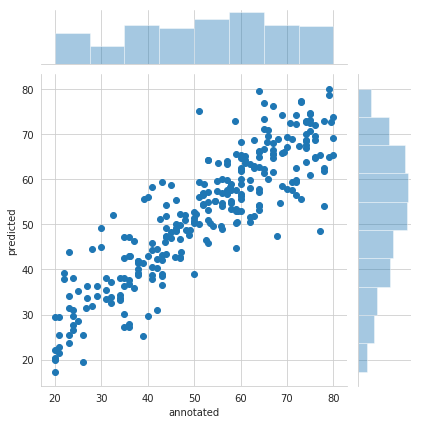

In [88]:
sns.jointplot(x="annotated",y="predicted",data=age)
plt.show()

/home/xiavan/.local/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/xiavan/.local/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


NameError: name 'stats' is not defined

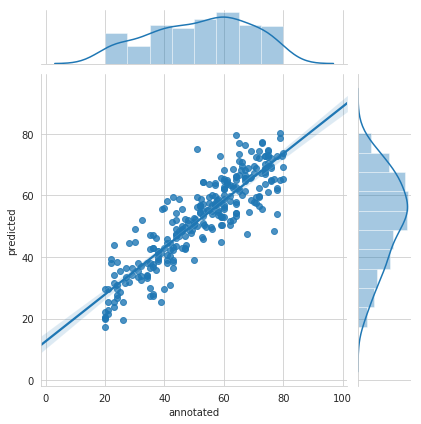

In [92]:
def r2(x,y):
    return(stats.pearsonr(x,y)[0]**2)
sns.jointplot(x="annotated",y="predicted",kind="reg",stat_func=r2,data=age)